In [1]:
import math, torch

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable

from PIL import Image

## Load the Data
NOTE: This data was processed using Google Colab. Visit the `./data-processing.colab.ipynb` for more info.

In [2]:
DATA = pd.read_pickle("./processed_images_small.pkl")

In [3]:
DATA

,image,category,attention_weights,embedding,captions
541,"[[[43, 39, 62], [41, 36, 60], [40, 36, 59], [4...",0,"[0.05418964475393295, 0.02181175723671913, 0.7...","[0.3958092927932739, -0.41102686524391174, 0.0...",there is a man kneeling down holding a fish in...
491,"[[[255, 255, 251], [255, 255, 251], [255, 255,...",0,"[0.05811980739235878, 0.010085792280733585, 0....","[0.04505084827542305, 0.4904085695743561, 0.07...",arafed fish caught on a fishing trip in the co...
492,"[[[181, 170, 152], [193, 182, 164], [192, 181,...",0,"[0.04152180999517441, 0.26502525806427, 0.7568...","[0.5317907929420471, -0.8023494482040405, 0.09...",arafed man holding a fish on a beach near a bo...
493,"[[[110, 135, 108], [110, 136, 111], [126, 151,...",0,"[0.06863167136907578, 0.020426800474524498, 0....","[0.30099257826805115, -0.8238896131515503, 0.0...",arafed fish caught in the river by a man in a ...
494,"[[[60, 60, 54], [71, 72, 66], [87, 88, 82], [6...",0,"[0.07256149500608444, 0.014937695115804672, 0....","[0.30781498551368713, -0.7023441791534424, 0.0...",a man kneeling down holding a fish in his hands
...,...,...,...,...,...
7748,"[[[235, 254, 248], [236, 254, 248], [237, 254,...",9,"[0.04415711760520935, 0.10343631356954575, 0.5...","[1.0861889123916626, -0.38086405396461487, 0.0...",there are many children standing under a large...
7749,"[[[254, 254, 254], [254, 254, 254], [254, 254,...",9,"[0.07850949466228485, 0.058887965977191925, 0....","[0.6354748606681824, -0.8015273213386536, 0.09...",araffe flying a kite in a field with a car in ...
7750,"[[[41, 69, 112], [42, 71, 113], [40, 71, 112],...",9,"[0.06918736547231674, 0.05884794145822525, 0.6...","[0.38840368390083313, 0.36730003356933594, 0.0...",there are two people flying a kite on a beach
7692,"[[[166, 173, 183], [166, 173, 183], [166, 173,...",9,"[0.06393760442733765, 0.01447345782071352, 0.3...","[0.23467440903186798, -0.7407791614532471, 0.0...",araffe flying a kite with a british flag on it


## Display Sample Images

<Figure size 640x480 with 0 Axes>

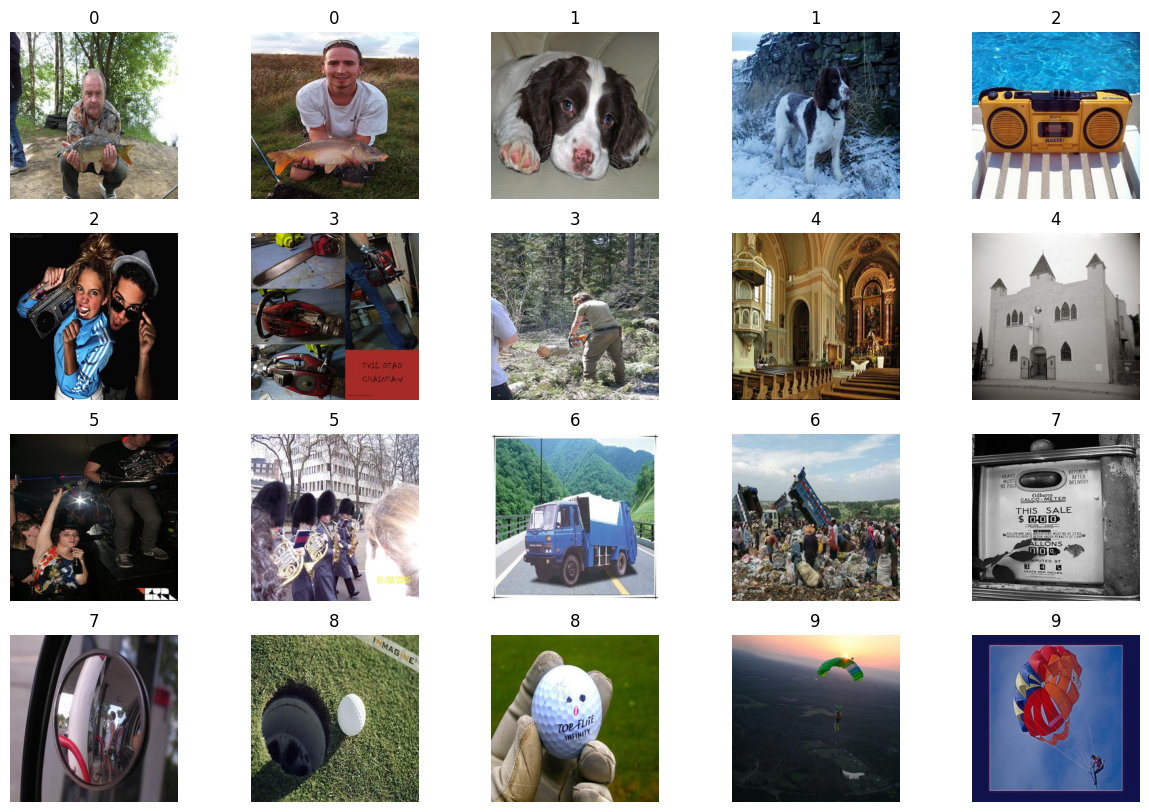

In [4]:
to_print = DATA.groupby('category', as_index=False).head(2).sort_values("category")

plt.clf()
_, ax = plt.subplots(nrows=4, ncols=5, figsize=(15,10))

for idx in range(len(to_print)):
    sub_ax = ax[int(np.floor(idx / 5))][idx % 5]
    sub_ax.axis('off')

    if idx < len(to_print):
        row = to_print.iloc[idx]
        sub_ax.imshow(row["image"])
        sub_ax.set_title(row["category"])

plt.show()

## Display Output Attentions & Embedding Similarity

In [5]:
def plot_embed_comparison(data, idx1, idx2, sim_threshold):
    im1_data = data.iloc[idx1]
    im2_data = data.iloc[idx2]

    embed_size = len(im1_data["embedding"])
    atten_size = len(im1_data["attention_weights"])

    _, ax = plt.subplots(nrows=3, ncols=3, figsize=(15,12))
    
    # Turn off all axes
    ax[0, 0].axis("off")
    ax[0, 1].axis("off")
    ax[0, 2].axis("off")
    ax[1, 0].axis("off")
    ax[1, 1].axis("off")
    ax[1, 2].axis("off")
    ax[2, 0].axis("off")
    ax[2, 1].axis("off")
    ax[2, 2].axis("off")

    # Display the images
    ax[0, 0].set_title(f"Image #{idx1}")
    ax[0, 0].imshow(im1_data["image"])
    ax[0, 1].set_title(f"Image #{idx2}")
    ax[0, 1].imshow(im2_data["image"])

    # Convert the attentions to images (and pad if necessary)
    atten_im_sz = math.ceil(math.sqrt(atten_size)) # The smallest square tha fits the attention weights
    atten_1 = np.pad(im1_data["attention_weights"], (0, (atten_im_sz**2) - atten_size), constant_values=-2).reshape((atten_im_sz, atten_im_sz))
    atten_2 = np.pad(im2_data["attention_weights"], (0, (atten_im_sz**2) - atten_size), constant_values=-2).reshape((atten_im_sz, atten_im_sz))

    # Display the attention weights
    ax[1, 0].set_title(f"Attention Weights #{idx1}")
    ax[1, 0].imshow(atten_1)
    ax[1, 1].set_title(f"Attention Weights #{idx2}")
    im = ax[1, 1].imshow(atten_2)

    divider = make_axes_locatable(ax[1, 1])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im, cax=cax)

    # Convert the embeddings to images (and pad if necessary)
    embed_im_sz = math.ceil(math.sqrt(embed_size)) # The smallest square tha fits the embeddings
    embed_1 = np.pad(im1_data["embedding"], (0, (embed_im_sz**2) - embed_size), constant_values=-2).reshape((embed_im_sz, embed_im_sz))
    embed_2 = np.pad(im2_data["embedding"], (0, (embed_im_sz**2) - embed_size), constant_values=-2).reshape((embed_im_sz, embed_im_sz))

    # Display the embeddings
    ax[2, 0].set_title(f"Embedding #{idx1}")
    ax[2, 0].imshow(embed_1)
    ax[2, 1].set_title(f"Embedding #{idx2}")
    ax[2, 1].imshow(embed_2)

    divider = make_axes_locatable(ax[2, 1])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im, cax=cax)

    # Compute the embedding similarity and convert to an image
    embed_sim = np.where(abs(embed_1 - embed_2) <= sim_threshold, abs(embed_1 - embed_2), 0)
    count = (abs(embed_1 - embed_2) <= sim_threshold).sum()
    embed_sim = Image.fromarray((embed_sim * 255 / np.max(embed_sim)).astype('uint8'))

    # Display the embedding similarity
    ax[2, 2].set_title(f"Abs. Diff. < {sim_threshold} : {count} Units")
    ax[2, 2].imshow(embed_sim)

    plt.show()

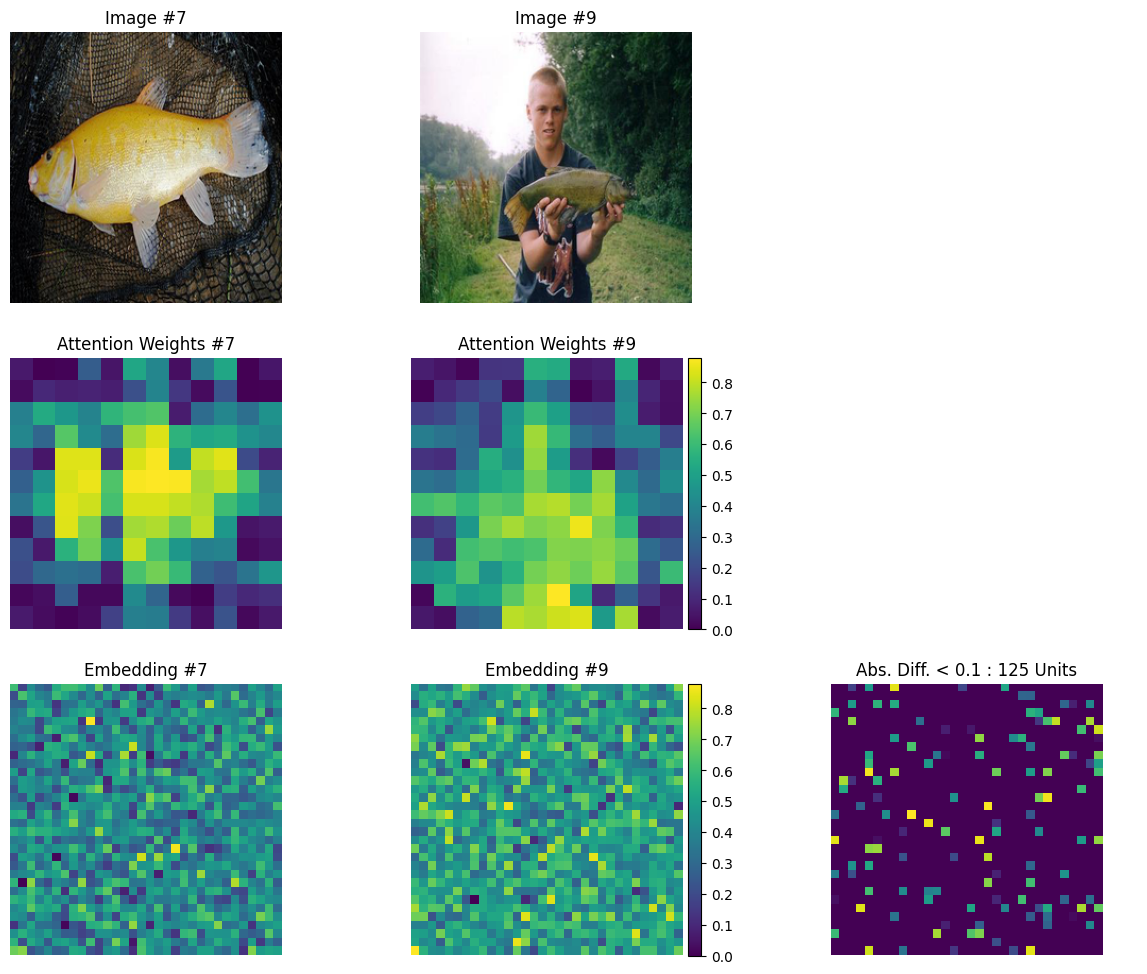

In [8]:
plot_embed_comparison(DATA, 7, 9, 0.1)